### Notebook: Clusterização de Partidas de League of Legends (Diamante - 10 Minutos)

Este notebook contém explicações detalhadas e código comentado para realizar um trabalho de clusterização utilizando dados de partidas ranqueadas de League of Legends (elo Diamante) nos 10 primeiros minutos.

## 1. Importação de bibliotecas e carregamento do dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

df = pd.read_csv('../../datasets/high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


## 2. Pré-processamento dos dados

2.1 Remover colunas que não devem entrar na clusterização

In [2]:
df_cluster = df.drop(['gameId', 'blueWins'], axis=1)

2.2 Padronização dos dados

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

## 3. Determinação do número ideal de clusters (Método Elbow e Silhouette)

Text(0, 0.5, 'Silhouette')

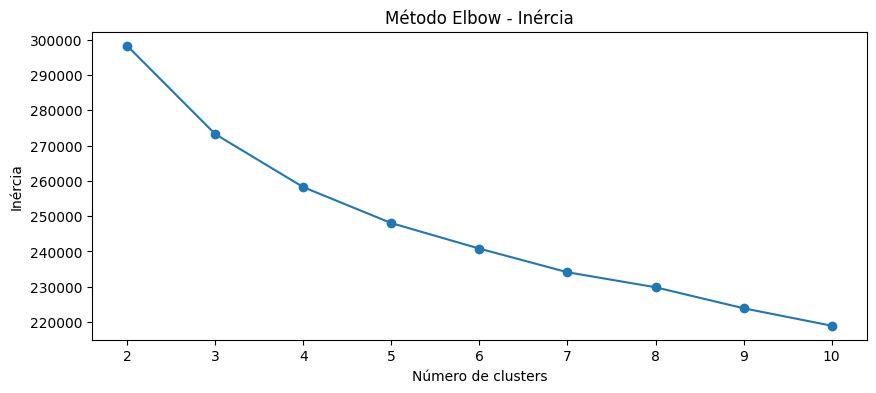

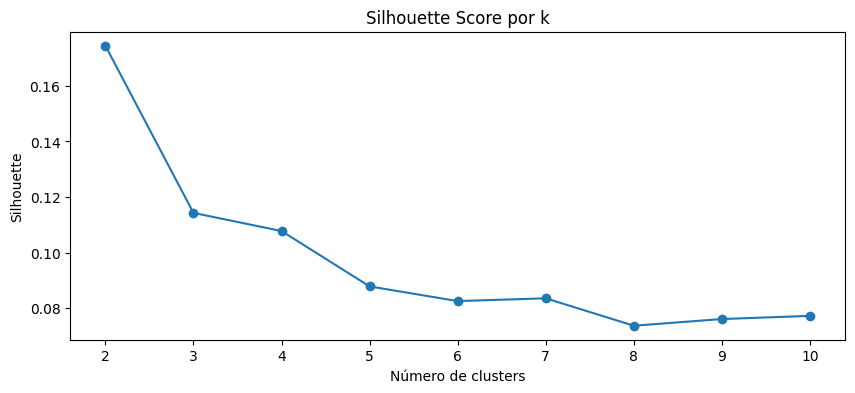

In [4]:
inertias = []
silhouettes = []
K = range(2, 11)


for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10,4))
plt.plot(K, inertias, marker='o')
plt.title('Método Elbow - Inércia')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')

plt.figure(figsize=(10,4))
plt.plot(K, silhouettes, marker='o')
plt.title('Silhouette Score por k')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette')

## 4. Clusterização com K-Means

In [ ]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, n_init=20, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
df['cluster_kmeans'] = labels_kmeans

4.1 Análise dos clusters

In [6]:
df.groupby('cluster_kmeans').mean()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
cluster_kmeans,,,,,,,,,,,,,,,,,,,,,
0,4.500894e+09,0.484566,22.646088,2.915051,0.479301,4.888490,5.026083,5.194066,0.533381,0.349844,...,0.012922,16100.634362,6.956114,18088.466858,224.121799,52.833932,77.387892,96.497727,22.412180,1610.063436
1,4.499838e+09,0.188056,21.485905,2.526335,0.288205,4.820475,9.272997,5.076039,0.298961,0.193249,...,0.126484,18199.849777,7.148665,18923.535608,223.887611,52.662463,2779.784496,2112.551558,22.388761,1819.984978
2,4.499177e+09,0.798269,22.510652,2.967377,0.734687,9.209720,4.870173,10.071904,0.798269,0.530293,...,0.009987,15493.972703,6.682024,16922.230360,202.059587,47.986352,-2649.833555,-1919.629827,20.205959,1549.397270


4.2 Relação com taxa de vitória azul

In [7]:
df.groupby('cluster_kmeans')['blueWins'].mean()

cluster_kmeans
0    0.484566
1    0.188056
2    0.798269
Name: blueWins, dtype: float64

## 5. Clusterização com Gaussian Mixture Model (GMM)

In [8]:
gmm = GaussianMixture(n_components=k_optimal, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
df['cluster_gmm'] = gmm_labels

5.1 Análise dos clusters (GMM)

In [9]:
df.groupby('cluster_gmm').mean()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,cluster_kmeans
cluster_gmm,,,,,,,,,,,,,,,,,,,,,
0,4.499625e+09,0.597917,44.701042,2.757292,0.591667,7.357292,5.743750,7.632292,0.769792,0.388542,...,16096.825000,6.817917,17514.929167,208.589583,50.511458,-1539.158333,-849.881250,20.858958,1609.682500,1.193750
1,4.500781e+09,0.237374,21.588384,2.588384,0.338384,4.936869,8.401515,5.378788,0.393939,0.285354,...,18869.502525,7.093939,18718.911616,227.184343,51.553030,3268.419192,1864.643939,22.718434,1886.950253,0.941919
2,4.500103e+09,0.500059,19.796316,2.843482,0.502757,6.109703,6.076851,6.592749,0.532442,0.362548,...,16422.617036,6.929579,17976.875983,217.878916,51.392233,4.798897,48.060777,21.787892,1642.261704,0.843013


5.2 Taxa de vitória por cluster

In [10]:
df.groupby('cluster_gmm')['blueWins'].mean()

cluster_gmm
0    0.597917
1    0.237374
2    0.500059
Name: blueWins, dtype: float64

### Comparando resultados GMM vs K-Means

| Método      | Cluster com maior vitória azul | Vitória azul | Interpretação            |
| ----------- | ------------------------------ | ------------ | ------------------------ |
| **K-Means** | Cluster 2                      | 79.8%        | Dominação azul forte     |
| **GMM**     | Cluster 0                      | 59.8%        | Azul levemente dominante |

<br>

| Método      | Cluster com menor vitória azul | Vitória azul | Interpretação            |
| ----------- | ------------------------------ | ------------ | ------------------------ |
| **K-Means** | Cluster 1                      | 18%          | Azul severamente atrás   |
| **GMM**     | Cluster 1                      | 24%          | Dominação vermelha forte |

<br>

| Método      | Cluster | Vitória azul | Interpretação |
| ----------- | ------- | ------------ | ------------- |
| **K-Means** | 0       | 48%          | Equilibrado   |
| **GMM**     | 2       | 50%          | Equilibrado   |


## 6. Visualização dos Clusters com PCA

Text(0, 0.5, 'Componente Principal 2')

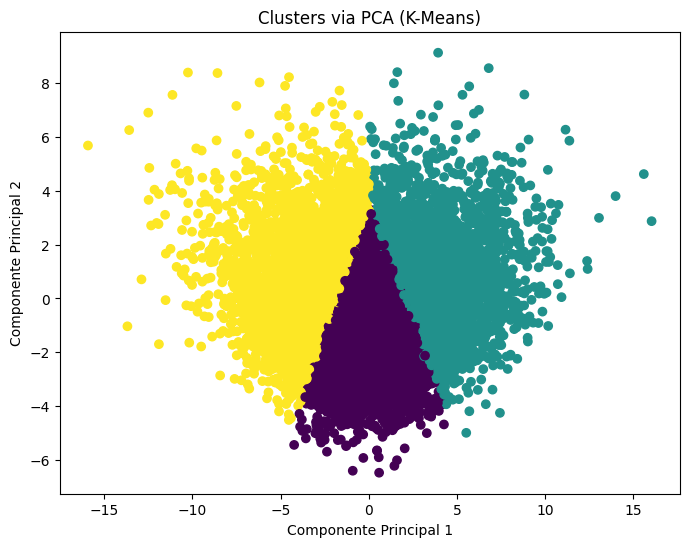

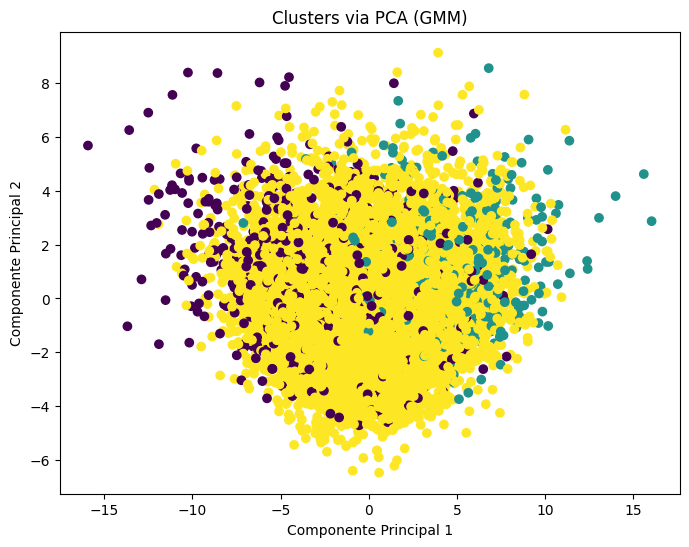

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans)
plt.title('Clusters via PCA (K-Means)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=gmm_labels)
plt.title('Clusters via PCA (GMM)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

## 7. Interpretação dos Clusters
Após gerar as médias dos clusters, podemos interpretar padrões como:

Cluster de Dominação Azul
- goldDiff muito positivo
- mais dragões, kills e XP
- alta taxa de blueWins

Cluster de Dominação Vermelha
- redKills maiores
- redTotalGold elevado
- blueWins baixo

Cluster Equilibrado
- poucas kills
- poucas diferenças de ouro e XP
- jogo lento e sem snowball precoce